# HEART STROKE PREDICTION PROJECT

In [1]:
#Importing libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

## 1. Importing and Exploring dataset

In [2]:
data=pd.read_csv("heart_stroke_clinical_records_dataset.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(299, 13)

### Note
We have 299 lines and 13 columns

In [5]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
#We split our dataset into two categories to make it easier for analysis.
Categorical_data=data[['anaemia','diabetes','high_blood_pressure','sex','smoking']]
Continous_data=data[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]

In [8]:
Categorical_data.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0


In [9]:
Continous_data.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


### Note for Categorical Data
Anaemia: 0 means that the person does not Anaemia, 1 means it does.

Diabetes: 0 means that the person does not Diabetes, 1 means it does.

High_blood_pressure: 0 means that the person does not High blood pressure, 1 means it does.

Sex: 0 means that the person is female, 1 means person is male.

Smoking: 0 means that the person does not Smoke, 1 means it does.

DEATH_EVENT: 0 means that Heart Stroke is not reason of Death, 1 means it is reason for Death.

In [10]:
#Finding missing value from dataset
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Note
Dataset does not contain any missing value.

In [11]:
#Finding null value from dataset
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Note
Dataset does not contain any null value.

In [12]:
#Describle() function help us with Descriptive Statistics for example count, min, max, mean, std
Continous_data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [13]:
data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


### Note
Since our result is DEATH_EVENT, we grouped our dataset by DEATH_EVENT and we can deduce that our dataset is unbalanced, because we have the total number of deaths(96), is less than half of total persons that did not die because of heart failure(203).

In [14]:
age=data[['age']]
platelets=data[['platelets']]

In [15]:
type(data[['age']])

pandas.core.frame.DataFrame

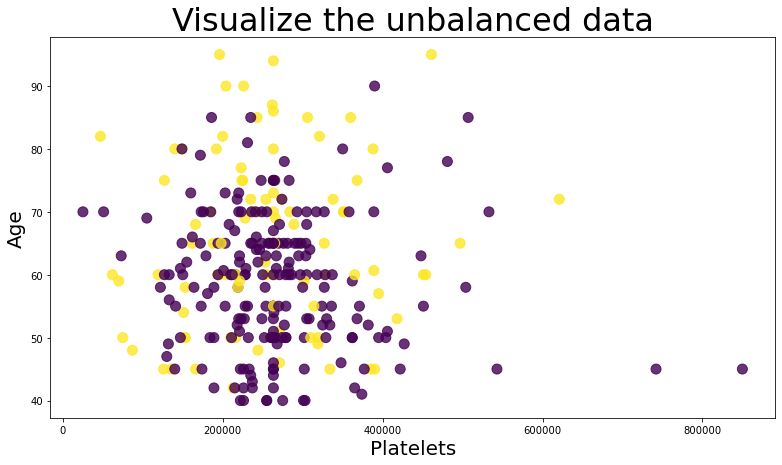

In [16]:
#Visualizing unbalanced data with a scatterplot, color depends on DEATH_EVENT(0 or 1)
plt.figure(figsize=(13,7))
plt.scatter(platelets,age,c=data['DEATH_EVENT'],s=100,alpha=0.8)
plt.xlabel("Platelets",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.title("Visualize the unbalanced data",fontsize=32)
plt.show()

### Note
We can see that we do have more circle in purple than in yellow

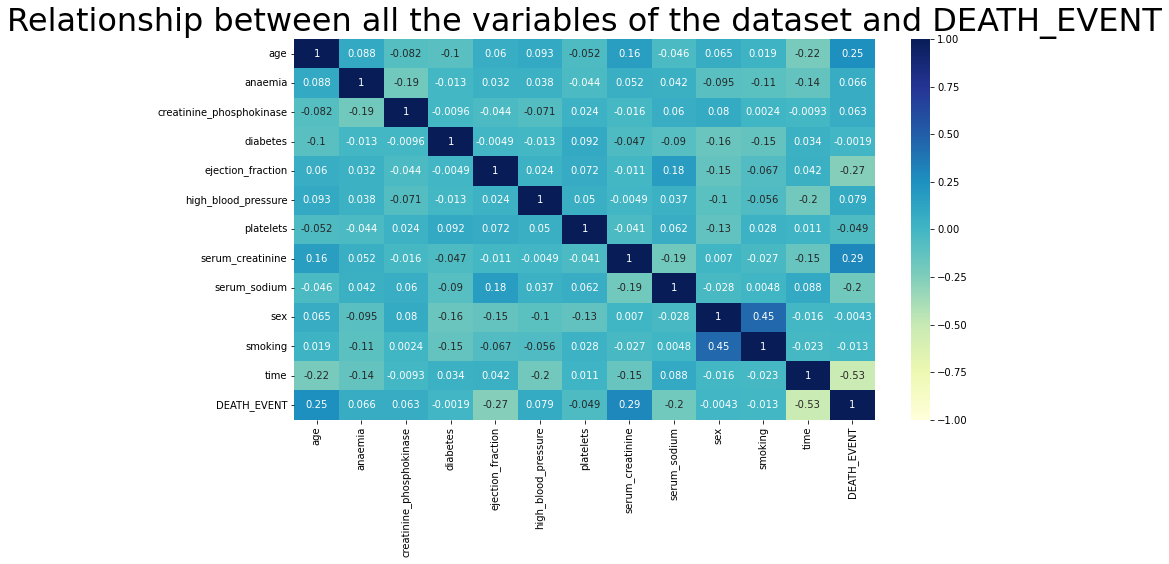

In [17]:
plt.figure(figsize=(13,7))
sns.heatmap(data.corr(),vmin=-1,vmax=1,cmap='YlGnBu',annot=True)
plt.title('Relationship between all the variables of the dataset and DEATH_EVENT',fontsize=32)
plt.show()

### Note 
There is positive correlation between DEATH_EVENT and Serium, Creatine and Age. We also have a negative correlation between DEATH_EVENT and time, ejection_fraction and serium sodium a little bit.

## 2. Data Visualization

In [18]:
Categorical_data=data[['anaemia','diabetes','high_blood_pressure','sex','smoking']]
Continous_data=data[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]

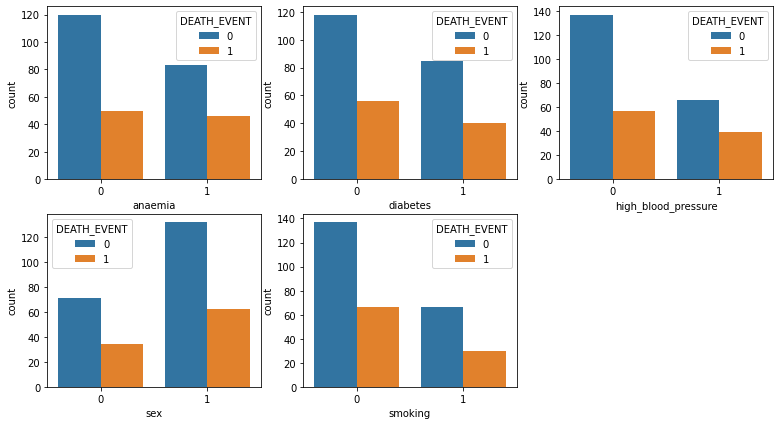

In [19]:
#Ploting the impact of Categorical data on DEATH_EVENT
plt.figure(figsize=(13,7))
for i,cat in enumerate(Categorical_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data=data,x=cat,hue="DEATH_EVENT")
plt.show()    

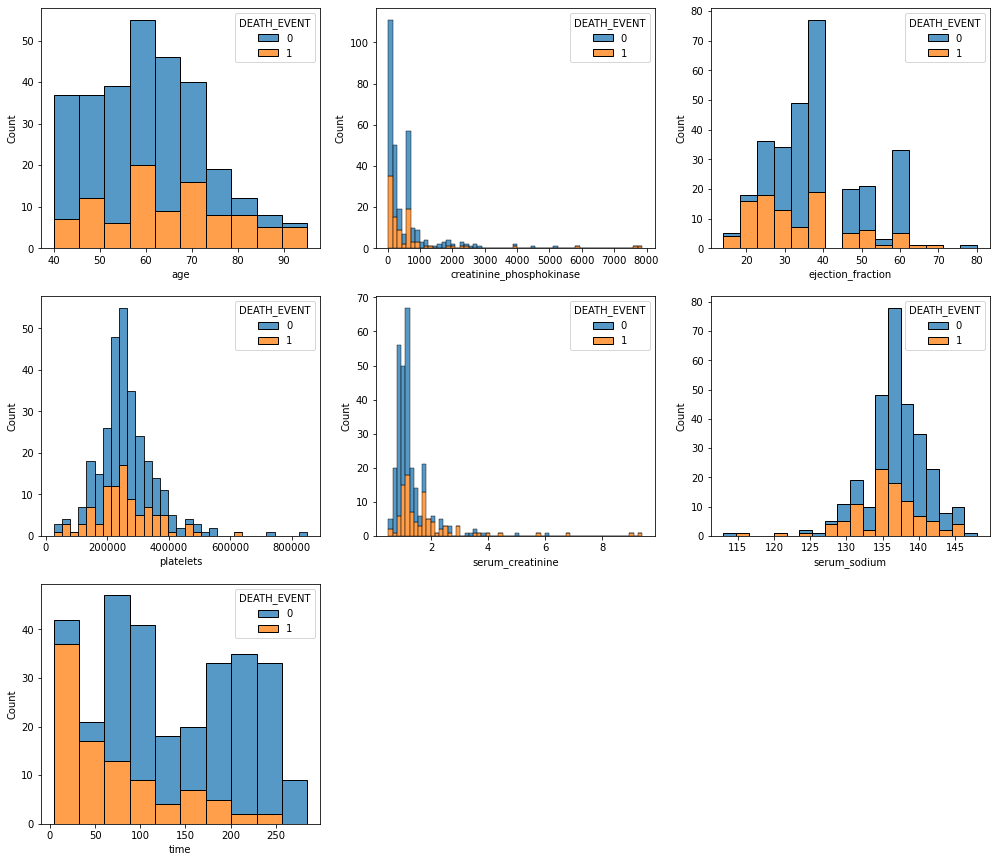

In [20]:
#Ploting the impact of Continous data on DEATH_EVENT
plt.figure(figsize=(17,15))
for j,con in enumerate(Continous_data):
    plt.subplot(3,3,j+1)
    sns.histplot(data=data,x=con,hue="DEATH_EVENT",multiple="stack")
plt.show()  

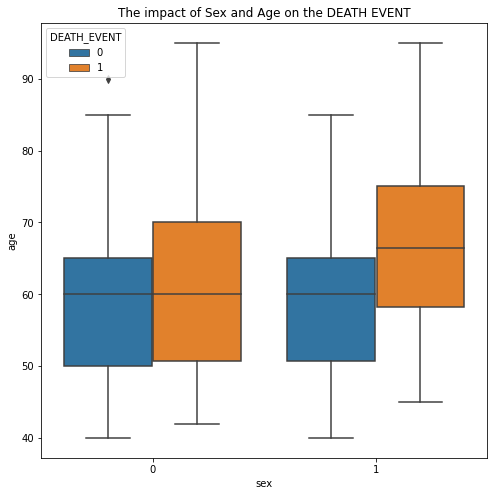

In [65]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data,x="sex",y="age",hue="DEATH_EVENT")
plt.title("The impact of Sex and Age on the DEATH EVENT")
plt.show()

In [39]:
#Analyzing the survival status on smoking

In [23]:
Smokers=data[data['smoking']==1]
NonSmokers=data[data['smoking']==0]

In [27]:
NonSurvived_Smokers=Smokers[Smokers['DEATH_EVENT']==1]
Survived_Smokers=Smokers[Smokers['DEATH_EVENT']==0]
NonSurvived_NonSmokers=NonSmokers[NonSmokers['DEATH_EVENT']==1]
Survived_NonSmokers=NonSmokers[NonSmokers['DEATH_EVENT']==0]

In [28]:
Smoking_data=[len(NonSurvived_Smokers),len(Survived_Smokers),len(NonSurvived_NonSmokers),len(Survived_NonSmokers)]
Smoking_label=['NonSurvived_Smokers','Survived_Smokers','NonSurvived_NonSmokers','Survived_NonSmokers']

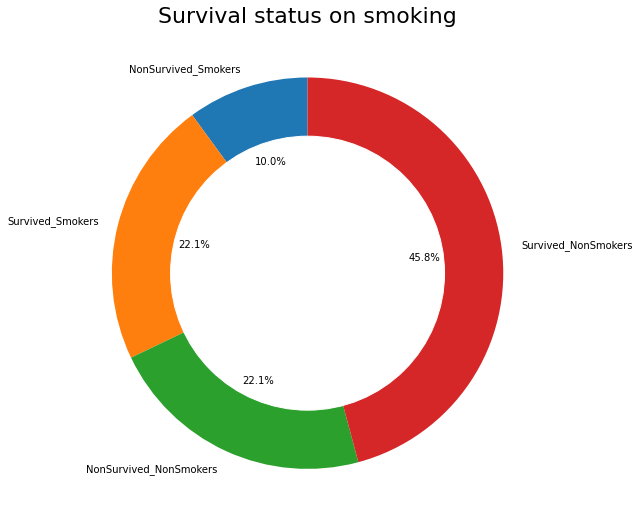

In [38]:
plt.figure(figsize=(9,9))
plt.pie(Smoking_data,labels=Smoking_label,autopct='%1.1f%%',startangle=90)
circle=plt.Circle((0,0),0.7,color="white")
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on smoking",fontsize=22)
plt.show()

In [40]:
#Analyzing Survival status on Sex

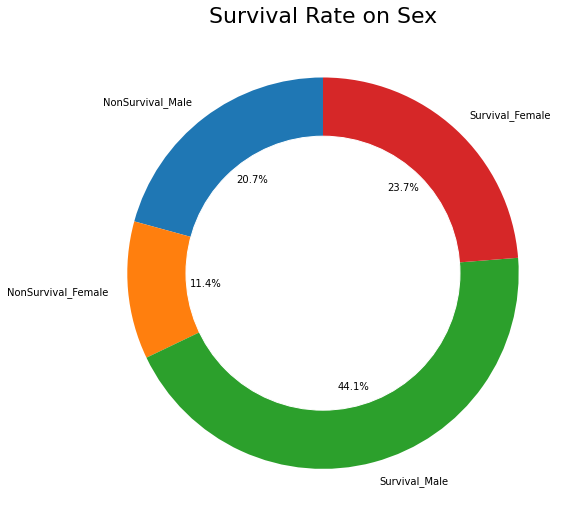

In [48]:
Male=data[data['sex']==1]
Female=data[data['sex']==0]

NonSurvival_Male=Male[Male['DEATH_EVENT']==1]
NonSurvival_Female=Female[Female['DEATH_EVENT']==1]
Survival_Male=Male[Male['DEATH_EVENT']==0]
Survival_Female=Female[Female['DEATH_EVENT']==0]

Sex_data=[len(NonSurvival_Male),len(NonSurvival_Female),len(Survival_Male),len(Survival_Female)]
Sex_labels=['NonSurvival_Male','NonSurvival_Female','Survival_Male','Survival_Female']

plt.figure(figsize=(9,9))
plt.pie(Sex_data,labels=Sex_labels,autopct='%1.1f%%',startangle=90)
circle=plt.Circle((0,0),0.7,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival Rate on Sex",fontsize=22)
plt.show()

In [49]:
#Analyzing Survival Status on Diabetes

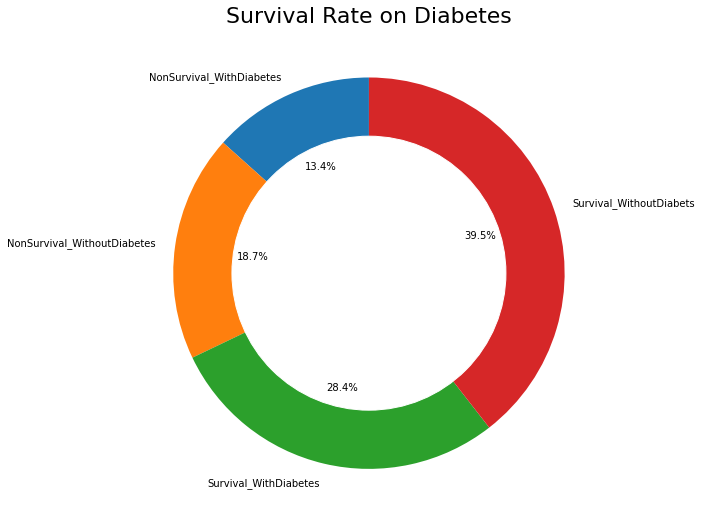

In [50]:
WithDiabetes=data[data['diabetes']==1]
WithoutDiabetes=data[data['diabetes']==0]

NonSurvival_WithDiabetes=WithDiabetes[WithDiabetes['DEATH_EVENT']==1]
NonSurvival_WithoutDiabetes=WithoutDiabetes[WithoutDiabetes['DEATH_EVENT']==1]
Survival_WithDiabetes=WithDiabetes[WithDiabetes['DEATH_EVENT']==0]
Survival_WithoutDiabetes=WithoutDiabetes[WithoutDiabetes['DEATH_EVENT']==0]

Diabetes_data=[len(NonSurvival_WithDiabetes),len(NonSurvival_WithoutDiabetes),len(Survival_WithDiabetes),len(Survival_WithoutDiabetes)]
Diabetes_labels=['NonSurvival_WithDiabetes','NonSurvival_WithoutDiabetes','Survival_WithDiabetes','Survival_WithoutDiabets']

plt.figure(figsize=(9,9))
plt.pie(Diabetes_data,labels=Diabetes_labels,autopct='%1.1f%%',startangle=90)
circle=plt.Circle((0,0),0.7,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival Rate on Diabetes",fontsize=22)
plt.show()

In [55]:
#Analyzing data status on Anaemeia

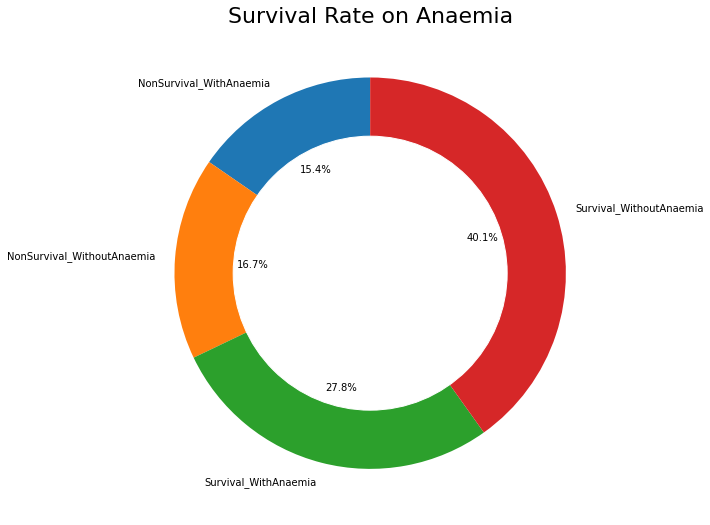

In [58]:
WithAnaemia=data[data['anaemia']==1]
WithoutAnaemia=data[data['anaemia']==0]

NonSurvival_WithAnaemia=WithAnaemia[WithAnaemia['DEATH_EVENT']==1]
NonSurvival_WithoutAnaemia=WithoutAnaemia[WithoutAnaemia['DEATH_EVENT']==1]
Survival_WithAnaemia=WithAnaemia[WithAnaemia['DEATH_EVENT']==0]
Survival_WithoutAnaemia=WithoutAnaemia[WithoutAnaemia['DEATH_EVENT']==0]

Anaemia_data=[len(NonSurvival_WithAnaemia),len(NonSurvival_WithoutAnaemia),len(Survival_WithAnaemia),len(Survival_WithoutAnaemia)]
Anaemia_labels=['NonSurvival_WithAnaemia','NonSurvival_WithoutAnaemia','Survival_WithAnaemia','Survival_WithoutAnaemia']

plt.figure(figsize=(9,9))
plt.pie(Anaemia_data,labels=Anaemia_labels,autopct='%1.1f%%',startangle=90)
circle=plt.Circle((0,0),0.7,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival Rate on Anaemia",fontsize=22)
plt.show()

In [59]:
#Analyzing Survival Status on High_Blood_Pressure

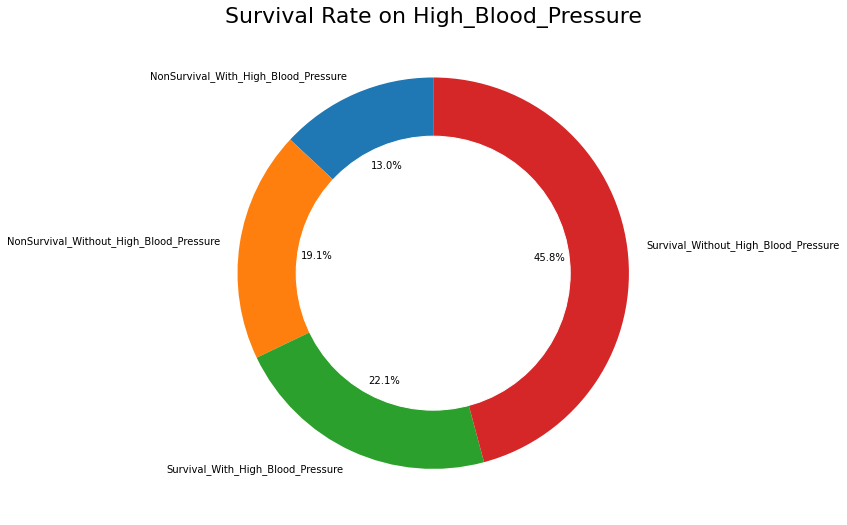

In [61]:
With_High_Blood_Pressure=data[data['high_blood_pressure']==1]
Without_High_Blood_Pressure=data[data['high_blood_pressure']==0]

NonSurvival_With_High_Blood_Pressure=With_High_Blood_Pressure[With_High_Blood_Pressure['DEATH_EVENT']==1]
NonSurvival_Without_High_Blood_Pressure=Without_High_Blood_Pressure[Without_High_Blood_Pressure['DEATH_EVENT']==1]
Survival_With_High_Blood_Pressure=With_High_Blood_Pressure[With_High_Blood_Pressure['DEATH_EVENT']==0]
Survival_Without_High_Blood_Pressure=Without_High_Blood_Pressure[Without_High_Blood_Pressure['DEATH_EVENT']==0]

High_Blood_Pressure_data=[len(NonSurvival_With_High_Blood_Pressure),len(NonSurvival_Without_High_Blood_Pressure),len(Survival_With_High_Blood_Pressure),len(Survival_Without_High_Blood_Pressure)]
High_Blood_Pressure_labels=['NonSurvival_With_High_Blood_Pressure','NonSurvival_Without_High_Blood_Pressure','Survival_With_High_Blood_Pressure','Survival_Without_High_Blood_Pressure']

plt.figure(figsize=(9,9))
plt.pie(High_Blood_Pressure_data,labels=High_Blood_Pressure_labels,autopct='%1.1f%%',startangle=90)
circle=plt.Circle((0,0),0.7,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival Rate on High_Blood_Pressure",fontsize=22)
plt.show()

# 3. Data Modelling & Prediction using Continous Data

In [63]:
x=data[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]
y=data['DEATH_EVENT']

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [79]:
# Data Scaling
Scaler=StandardScaler()
x_train_scaled=Scaler.fit_transform(x_train)
x_test_scaled=Scaler.transform(x_test)

In [80]:
Accuracy_list=[] #A list to save all the values from different Models accuracy for comparison using a Bar Chart.

### 3.1 Logistic Regression

In [85]:
lr_model=LogisticRegression()
lr_model.fit(x_train_scaled,y_train)
lr_prediction=lr_model.predict(x_test_scaled)
lr_accuracy=(round(accuracy_score(lr_prediction,y_test),4)*100) #Percentage

Accuracy_list.append(lr_accuracy)

### 3.2 Support Vector Machine

In [86]:
svc_model=SVC()
svc_model.fit(x_train_scaled,y_train)
svc_prediction=svc_model.predict(x_test_scaled)
svc_accuracy=(round(accuracy_score(svc_prediction,y_test),4)*100) #Percentage

Accuracy_list.append(svc_accuracy)

### 3.3 KNearestNeighbors

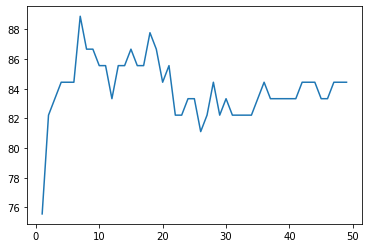

In [92]:
#We will use this program to find optimal value of K.
knn_list=[]
for k in range(1,50):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train_scaled,y_train)
    knn_prediction=knn_model.predict(x_test_scaled)
    knn_accuracy=(round(accuracy_score(knn_prediction,y_test),4)*100)
    knn_list.append(knn_accuracy)
k=np.arange(1,50)
plt.plot(k,knn_list)

### 3.4 Decision Tree Classifier

In [95]:
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=2)
dt_model.fit(x_train_scaled,y_train)
dt_prediction=dt_model.predict(x_test_scaled)
dt_accuracy=(round(accuracy_score(dt_prediction,y_test),4)*100) #Percentage

Accuracy_list.append(dt_accuracy)

### 3.5 Random Forest Classifier

In [96]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train_scaled,y_train)
rf_prediction=rf_model.predict(x_test_scaled)
rf_accuracy=(round(accuracy_score(rf_prediction,y_test),4)*100) #Percentage

Accuracy_list.append(rf_accuracy)

In [97]:
#Accuracy List
Accuracy_list

[87.78, 87.78, 86.67, 88.89, 90.0]

In [98]:
model=['Logistic Regression','SVC','KNearestNeighbors','Decision Tree','Random Forest']

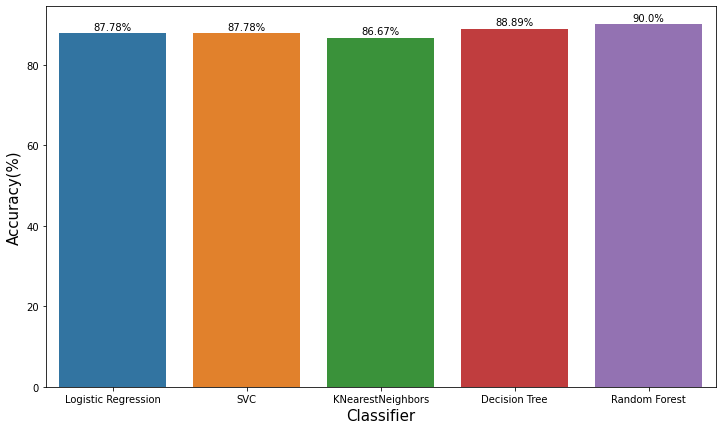

In [104]:
plt.figure(figsize=(12,7))
ax=sns.barplot(x=model,y=Accuracy_list)
plt.xlabel("Classifier",fontsize=15)
plt.ylabel("Accuracy(%)",fontsize=15)
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x=p.get_x()
    y=p.get_y()
    ax.annotate(f"{height}%",(x+width/2,y+height*1.01),ha="center")
plt.show()

# Conclusion